In [1]:
# %load /home/glebi/git/experiment-automation/processing_tools.py
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import scienceplots

plt.style.use(['science', 'russian-font'])

matplotlib.rcParams.update({
    'figure.figsize': [6, 4],
    'savefig.facecolor': 'white',
    'figure.dpi': 150.0,
    'font.size': 12.0,
})


In [2]:
data = np.loadtxt("data.csv", delimiter=",")
Utp, R2 = data.T # mV, Ohm

f = 622 # Hz
c = 41e-6 # V/K
T0 = 25 + 273.15 # K
T = Utp*1e-3/c + T0
T_sigma = .01*1e-3/c

R1 = 220 # Ohm
R3 = 560 # Ohm
l = 40e-3 # m
S = 4.1e-3 * 4.15e-3 # m^2
sigma_x = (l / S) * (R1 / R3) * (1 / R2)

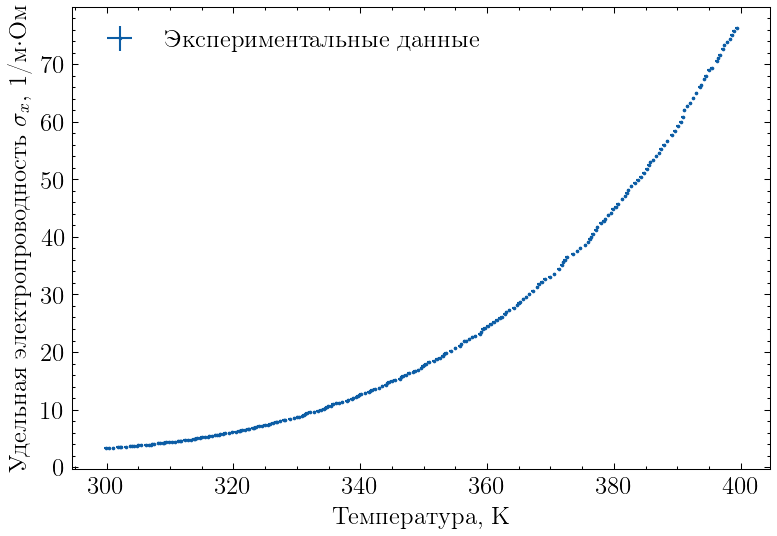

In [3]:
plt.errorbar(T, sigma_x, xerr=T_sigma, yerr=0, fmt=".", markersize=1.5, label="Экспериментальные данные")
plt.xlabel("Температура, K")
plt.ylabel(r"Удельная электропроводность $\sigma_x$, 1/м$\cdot$Ом")

# plt.yscale("log")
plt.legend()
plt.savefig("sigmaOnT.png")
plt.show()

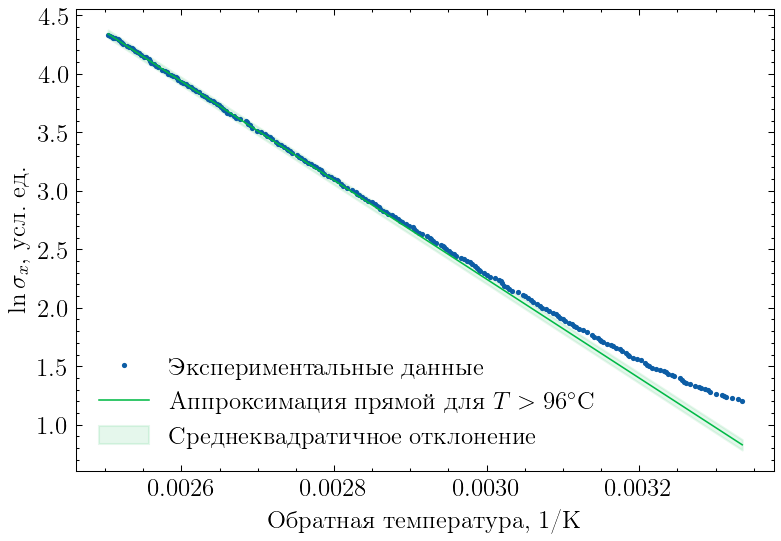

In [5]:
T_edge = 96 # celcium grad

revT = 1 / T
lnSigma = np.log(sigma_x)
line = lambda x, k, b: k*x + b
idx = T > (T_edge + 273.15) # T more than 90 degrees
popt, pcov = curve_fit(line, revT[idx], lnSigma[idx])
perr = np.sqrt(np.diag(pcov))

k, b = popt
k_sigma = perr[0]
b_sigma = perr[1]

plt.plot(revT, lnSigma, ".", markersize=3, label="Экспериментальные данные")
plt.plot(revT, line(revT, *popt), lw=.75, label=fr"Аппроксимация прямой для $T > {T_edge}^\circ$С")
plt.fill_between(revT, line(revT, k + k_sigma, b), line(revT, k - k_sigma, b), alpha=.1, color="C1", label=fr"Среднеквадратичное отклонение")
plt.xlabel("Обратная температура, 1/K")
plt.ylabel(r"$\ln \sigma_x$, усл. ед.")

plt.legend()
plt.savefig("logSigmaOnRevT.png")
plt.show()

In [6]:
k_sigma

13.321019102856487

In [8]:
-k

4228.052416617957

In [113]:
k_B = 1.380649e-23 # Дж/К
e = 1.602176634e-19 # Кл
Delta = -2 * k_B * k / e # eV
Delta_sigma = 2 * k_B * k_sigma / e # eV
print(f"{Delta*1e3:.1f}+-{Delta_sigma*1e3:.1f} мэВ")

728.7+-2.3 мэВ


In [114]:
sum(idx)

69